In [99]:
#OS
# import io
# from google.colab import files
# import multiprocessing

#Basic
import numpy as np
import pandas as pd

#NLP
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')

import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec

#Text
from string import punctuation
from string import digits
import re

#Vis
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
# from colour import Color
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.feature_extraction.text import CountVectorizer
import textstat
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

#Memory
import multiprocessing

# import statsmodels.formula.api as sm
# import scipy.optimize
# import scipy
# import scipy.stats

## Understanding Data

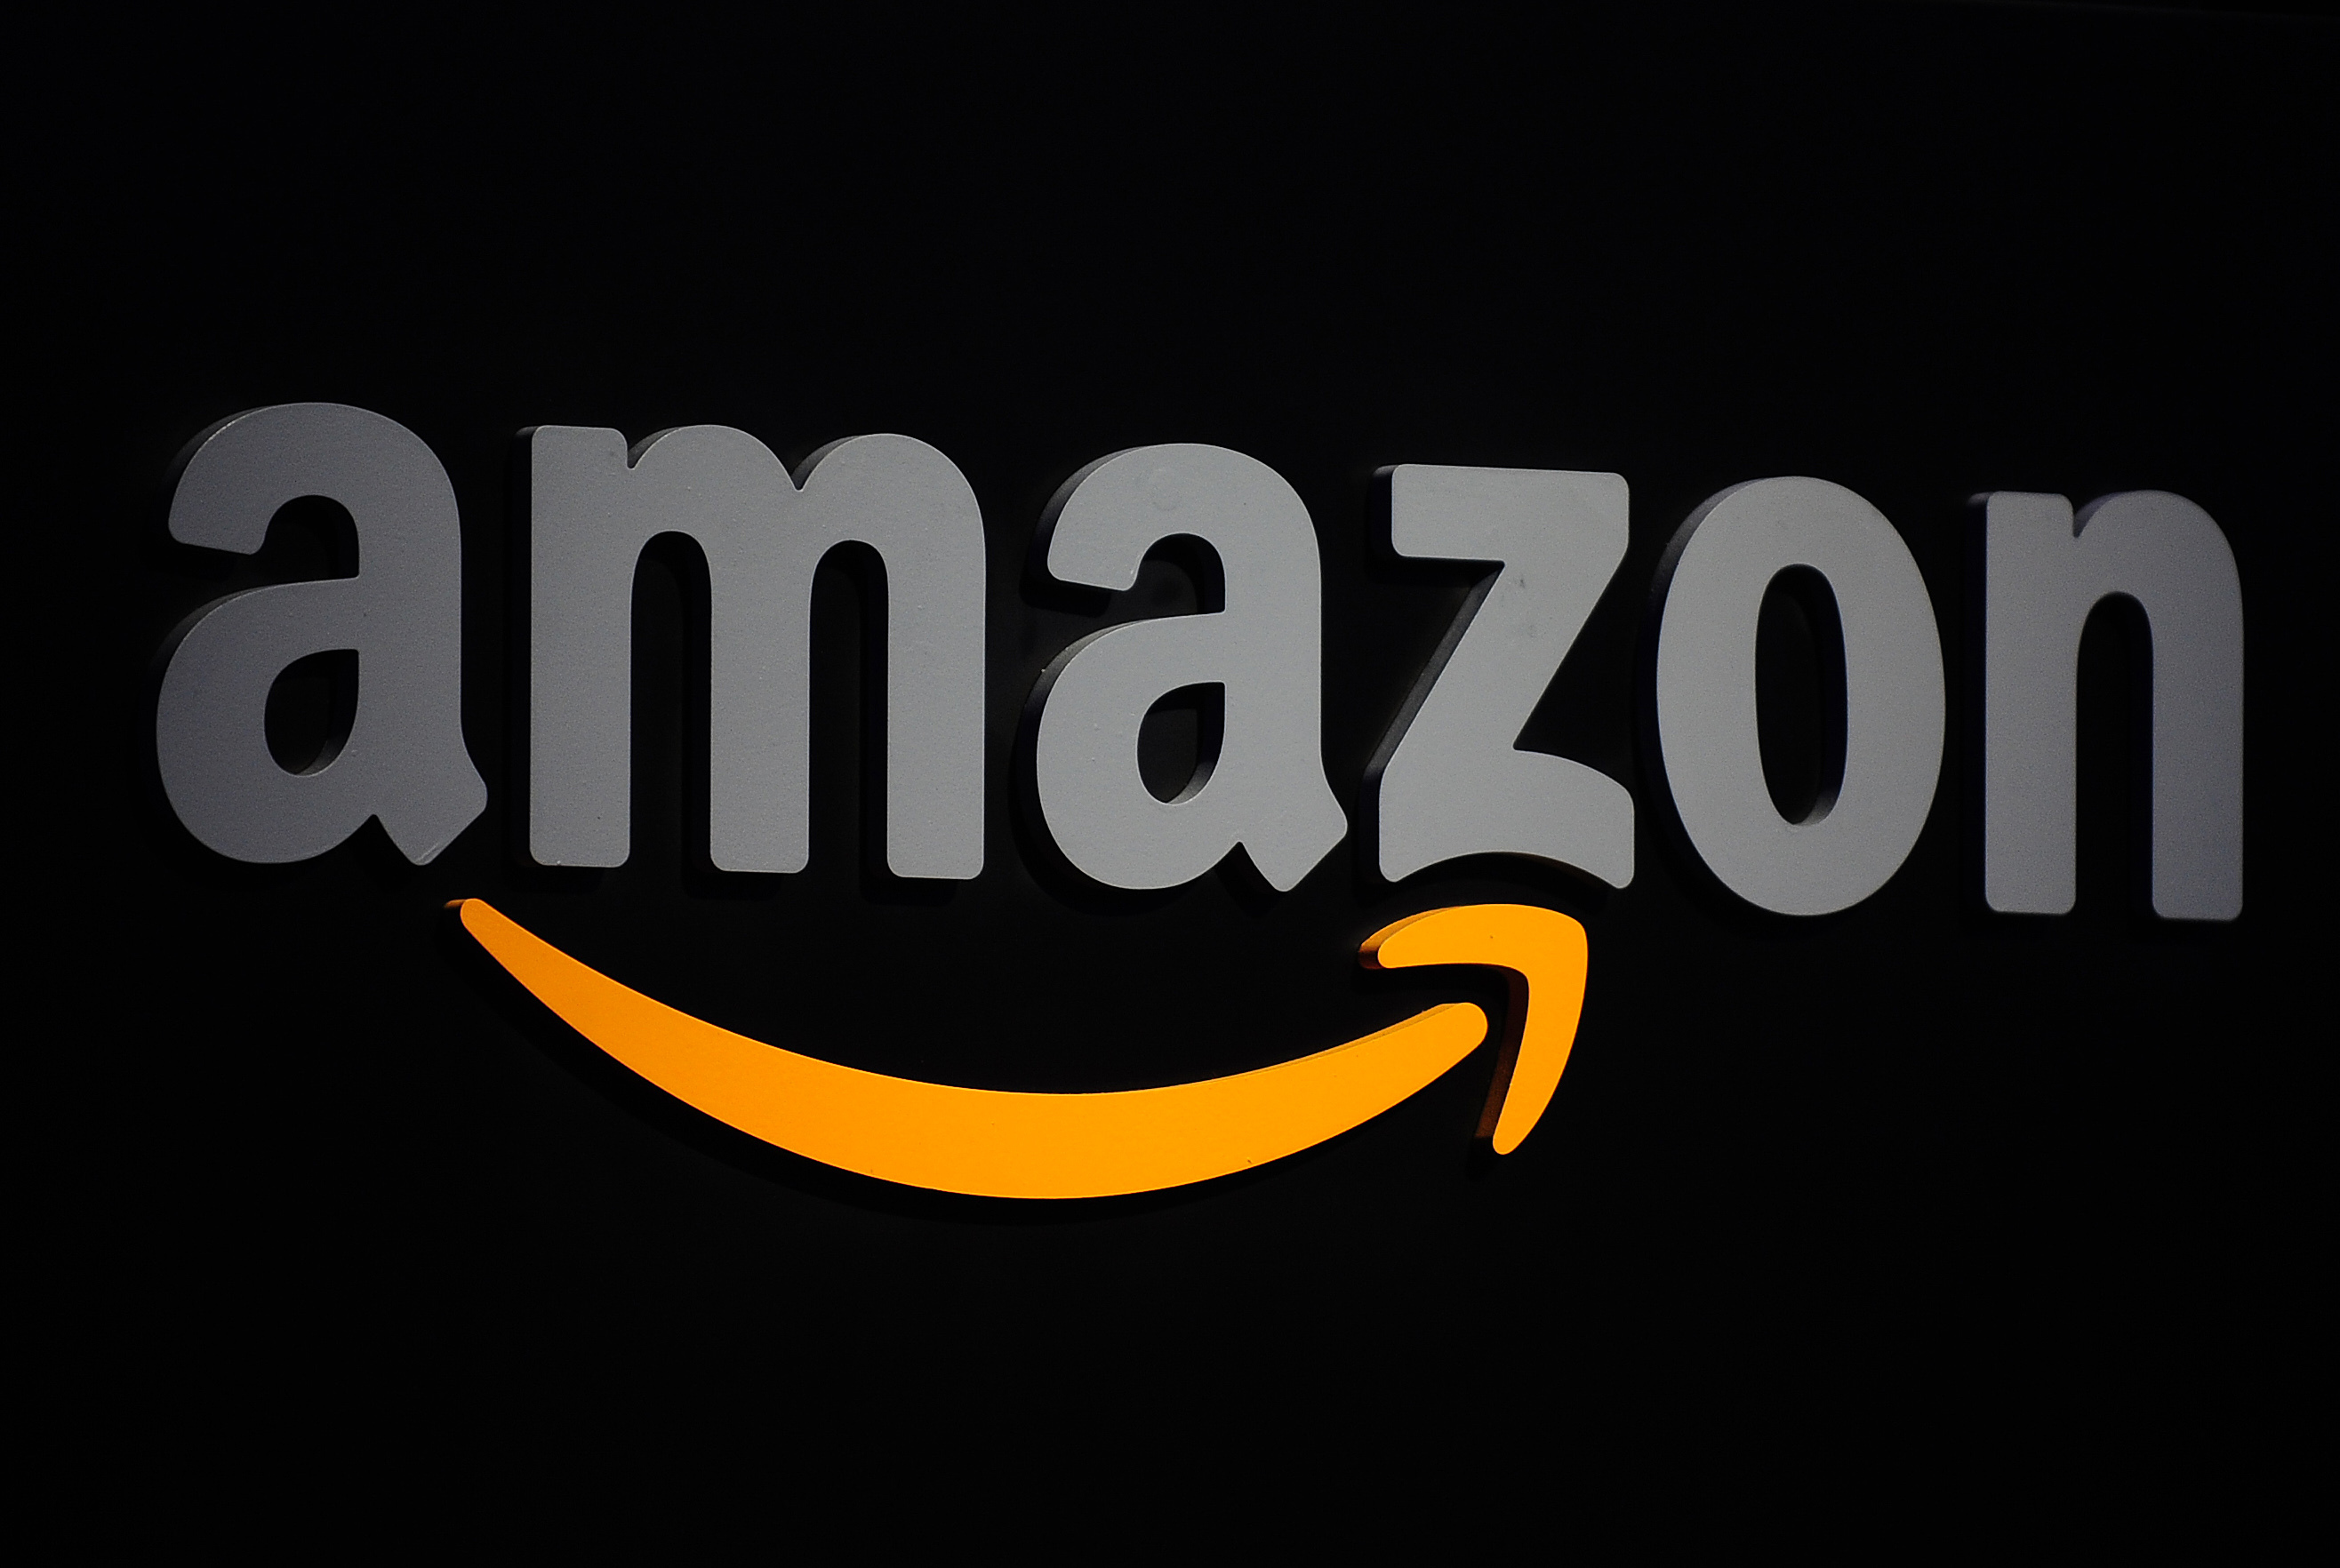

### Data Description

- `Id`: Unique identifier of the review
- `Product Id`: Unique identifier for the product
- `User Id`: Unique identifier for the user
- `Profile Name`: Profile name of the user
- `Helpfulness Numerator`: Number of users who found the review helpful
- `Helpfulness Denominator`: Number of users who indicated whether they found the review helpful or not
- `Score`: Rating (1-5 stars)
- `Time`: Timestamp (Oct 1999 — Oct 2012)
- `Summary`: Summary of the review
- `Text`: Review

In [2]:
amazon_reviews = pd.read_csv('Reviews.csv')
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [129]:
print("Id unique count is", amazon_reviews_pre['Id'].nunique())
print("User Id unique count is",amazon_reviews_pre['UserId'].nunique())
print("Product Id unique count is",amazon_reviews_pre['ProductId'].nunique())

Id unique count is 568411
User Id unique count is 256047
Product Id unique count is 74258


In [49]:
amazon_reviews[amazon_reviews.HelpfulnessDenominator == 0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
...,...,...,...,...,...,...,...,...,...,...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...


## Data Cleaning

In [3]:
amazon_reviews_cleaned = amazon_reviews.copy()

### Handling NaNs

In [4]:
missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,16,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,27,0.0
Text,0,0.0


In [4]:
amazon_reviews_cleaned = amazon_reviews_cleaned.dropna(subset = ['ProfileName', 'Summary'])

missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,0,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,0,0.0
Text,0,0.0


In [12]:
amazon_reviews_cleaned['Score'].describe()

count    568411.000000
mean          4.183309
std           1.310368
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Handling duplicates

In [65]:
amazon_reviews_cleaned[amazon_reviews_cleaned.duplicated(subset=['UserId', 'ProductId',
                                                                 'ProfileName', 'Score', 'Text'], keep=False)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Summary,Cleaned_Text
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",one bite and you ll become a chippoisseur,i m addicted to salty and tangy flavors so whe...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",one bite and you ll become a chippoisseur,i m addicted to salty and tangy flavors so whe...
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",one bite and you ll become a chippoisseur,i m addicted to salty and tangy flavors so whe...
2334,2335,B0001FQVCK,A5D06XJHDXK75,C. Po,3,3,5,1190592000,Chocolate Italian kisses - need I say more?,My family has been in love with Baci's ever si...,chocolate italian kisses need i say more,my family has been in love with baci s ever si...
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,5,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...,baci s are pure heaven great gift stocking stu...,my family has been in love with baci s ever si...
...,...,...,...,...,...,...,...,...,...,...,...,...
567984,567985,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",8,8,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,organic and tasty,i have month olds and no time to write a great...
568007,568008,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3,3,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,these pouches are great,these pouches are so easy and convenient they ...
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,organic and tasty,i have month olds and no time to write a great...
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,these pouches are great,these pouches are so easy and convenient they ...


Keeping duplicates doesn't make sense, so let's drop them.

In [5]:
amazon_reviews_cleaned.drop_duplicates(subset=['UserId', 'ProductId','ProfileName', 'Score',
                                               'Text'], ignore_index=True, inplace=True)
amazon_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567122 entries, 0 to 567121
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      567122 non-null  int64 
 1   ProductId               567122 non-null  object
 2   UserId                  567122 non-null  object
 3   ProfileName             567122 non-null  object
 4   HelpfulnessNumerator    567122 non-null  int64 
 5   HelpfulnessDenominator  567122 non-null  int64 
 6   Score                   567122 non-null  int64 
 7   Time                    567122 non-null  int64 
 8   Summary                 567122 non-null  object
 9   Text                    567122 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.3+ MB


### Making sense of Helpfulness metrics

There are some rules dealing with the two helpfulness metrics we do have as per their definitions. It's impossible for Helpfulness Numerator to be greater than HelpfullnessDenominator. So let's remove the observations that break this rule.

In [10]:
amazon_reviews_cleaned['HelpfulnessNumerator'].describe()

count    568411.000000
mean          1.743874
std           7.636781
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

In [11]:
amazon_reviews_cleaned['HelpfulnessDenominator'].describe()

count    568411.000000
mean          2.227876
std           8.288752
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

In [72]:
amazon_reviews_cleaned[amazon_reviews_cleaned.HelpfulnessNumerator > amazon_reviews_cleaned.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Summary,Cleaned_Text
44642,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,pure cocoa taste with crunchy almonds inside,it was almost a love at first bite the perfect...
64287,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,bought this for my son at college,my son loves spaghetti so i didn t hesitate or...


In [6]:
amazon_reviews_cleaned = amazon_reviews_cleaned[amazon_reviews_cleaned.HelpfulnessNumerator <= amazon_reviews_cleaned.HelpfulnessDenominator]
amazon_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567120 entries, 0 to 567121
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      567120 non-null  int64 
 1   ProductId               567120 non-null  object
 2   UserId                  567120 non-null  object
 3   ProfileName             567120 non-null  object
 4   HelpfulnessNumerator    567120 non-null  int64 
 5   HelpfulnessDenominator  567120 non-null  int64 
 6   Score                   567120 non-null  int64 
 7   Time                    567120 non-null  int64 
 8   Summary                 567120 non-null  object
 9   Text                    567120 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.6+ MB


In [7]:
#Text Cleaning
amazon_reviews_cleaned[['Cleaned_Summary','Cleaned_Text']] = amazon_reviews_cleaned[['Summary','Text']].astype(str)

In [8]:
def clean_text(df, text):

    for i in text:
        df[i] = df[i].astype(str)

        #Lower all characters
        df[i] = df[i].apply(lambda x: x.lower())
        print('Lowercases done!')

        #Remove punctuation
        df[i] = df[i].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x)))
        print('Removing punctuation done!')

        #Remove non-English characters
        df[i] = df[i].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
        df[i] = df[i].apply(lambda x: re.sub('\s+', ' ', str(x)))
        print('Filtering by English done!')

        #Remove URLs
        df[i] = df[i].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', ' ', str(x), flags=re.MULTILINE))
        print('Eliminating URLs done!')

        #Remove emojis
        emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  "]+", flags=re.UNICODE)
        df[i] = df[i].apply(lambda x: re.sub(emoji_pattern, ' ', str(x)))
        print('Emoji cleaning done!', '\n')
        
        
    print('All done!')

In [9]:
clean_text(amazon_reviews_cleaned,['Cleaned_Summary', 'Cleaned_Text'])

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

All done!


In [10]:
#Remove words less than 3 letters
amazon_reviews_cleaned['Cleaned_Text'] = amazon_reviews_cleaned['Cleaned_Text'].str.findall('\w{3,}').str.join(' ')
amazon_reviews_cleaned['Cleaned_Summary'] = amazon_reviews_cleaned['Cleaned_Summary'].str.findall('\w{3,}').str.join(' ')

## Data Preprocessing

In [11]:
amazon_reviews_pre = amazon_reviews_cleaned.copy()

In [12]:
amazon_reviews_pre['Cleaned_Summary']

0                      good quality dog food
1                             not advertised
2                           delight says all
3                             cough medicine
4                                great taffy
                         ...                
567117                      will not without
567118                          disappointed
567119              perfect for our maltipoo
567120    favorite training and reward treat
567121                           great honey
Name: Cleaned_Summary, Length: 567120, dtype: object

In [13]:
#List before tokenizing
summary_list = amazon_reviews_pre['Cleaned_Summary'].tolist()
review_list = amazon_reviews_pre['Cleaned_Text'].tolist()

#Tokenize
def tokenize(df, text):
      for i in text:
        df[i] = df[i].apply(lambda x: x.split(" "))

def strip(word):
    return word.strip

In [14]:
amazon_reviews_pre[['Token_Summary','Token_Text']] = amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]

In [15]:
tokenize(amazon_reviews_pre,['Token_Summary','Token_Text'])

for i in amazon_reviews_pre[['Token_Summary','Token_Text']]:
    map(strip,  i)

In [16]:
amazon_reviews_pre['Token_Summary'] = amazon_reviews_pre['Token_Summary'].tolist()
amazon_reviews_pre['Token_Text'] = amazon_reviews_pre['Token_Text'].tolist()

In [230]:
#Test
amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]

,Cleaned_Summary,Cleaned_Text
0,good quality dog food,have bought several the vitality canned dog fo...
1,not advertised,product arrived labeled jumbo salted peanuts t...
2,delight says all,this confection that has been around few centu...
3,cough medicine,you are looking for the secret ingredient robi...
4,great taffy,great taffy great price there was wide assortm...
...,...,...
567117,will not without,great for sesame chicken this good not better ...
567118,disappointed,disappointed with the flavor the chocolate not...
567119,perfect for our maltipoo,these stars are small you can give those one t...
567120,favorite training and reward treat,these are the best treats for training and rew...


In [17]:
#Remove stopwords
sw = set(stopwords.words('english'))
new_sw = ['href', 'team', 'every', 'each', 'though', 'maybe', 'yet', 'bit', 'even', 'really']

# amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Token_Summary'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Token_Summary']]
# amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Token_Summary'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Token_Summary']]


# amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Token_Text'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Token_Text']]
# amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Token_Text'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Token_Text']]


In [18]:
#Remove digits
dg = digits
# amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Token_Summary'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Token_Summary']]

# amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Token_Text'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Token_Text']]

In [19]:
# Lemmatize
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

stemmer = nltk.stem.WordNetLemmatizer()
amazon_reviews_pre['Token_Summary'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_pre['Token_Summary']]
amazon_reviews_pre['Token_Summary'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_pre['Token_Summary']]
amazon_reviews_pre['Token_Summary'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_pre['Token_Summary']]
amazon_reviews_pre['Token_Summary'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_pre['Token_Summary']]

In [20]:
amazon_reviews_pre['Token_Text'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_pre['Token_Text']]
amazon_reviews_pre['Token_Text'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_pre['Token_Text']]
amazon_reviews_pre['Token_Text'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_pre['Token_Text']]
amazon_reviews_pre['Token_Text'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_pre['Token_Text']]

In [16]:
#Test
amazon_reviews_pre['Token_Text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken, good, well, resturant...
568450    [disappointed, flavor, chocolate, notes, espec...
568451    [stars, small, give, one, training, session, t...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Cleaned_Text, Length: 568411, dtype: object

In [21]:
#Save filtered columns
summary_text = amazon_reviews_pre['Token_Summary']
review_text = amazon_reviews_pre['Token_Text']

In [36]:
amazon_reviews_pre.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Token_Text,reviews_length,avg_word_length,reviews_per_user,avg_product_score,is_positive_score,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,"[buy, several, vitality, can, dog, food, produ...",232,1.0,1,5.0,1,0.000,0.652,0.348,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,"[product, arrive, label, jumbo, salt, peanut, ...",163,1.0,1,1.0,0,0.169,0.831,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,"[confection, around, century, light, pillowy, ...",432,1.0,3,4.0,1,0.105,0.715,0.180,0.8265
3,320691,B000CQ26E0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",0,0,4,1187740800,"Fast, Easy and organic","For speed and wholesome goodness, Annie's can ...",...,"[speed, wholesome, goodness, annie, never, bea...",234,1.0,3,4.0,1,0.000,0.685,0.315,0.9435
4,320680,B000CQ26E0,A2RNYW2HIQBGSM,Carlos Alvarez,3,3,5,1238371200,"Tastes great, easy to make",These are really good. You do need to add jus...,...,"[good, need, add, water, recommend, best, cons...",167,1.0,45,4.0,1,0.000,0.724,0.276,0.8718


In [40]:
amazon_reviews_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567120 entries, 0 to 567119
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      567120 non-null  int64  
 1   ProductId               567120 non-null  object 
 2   UserId                  567120 non-null  object 
 3   ProfileName             567120 non-null  object 
 4   HelpfulnessNumerator    567120 non-null  int64  
 5   HelpfulnessDenominator  567120 non-null  int64  
 6   Score                   567120 non-null  int64  
 7   Time                    567120 non-null  int64  
 8   Summary                 567120 non-null  object 
 9   Text                    567120 non-null  object 
 10  Cleaned_Summary         567120 non-null  object 
 11  Cleaned_Text            567120 non-null  object 
 12  Token_Summary           567120 non-null  object 
 13  Token_Text              567120 non-null  object 
 14  reviews_length      

In [45]:
#Checking duplicates again

amazon_reviews_pre[amazon_reviews_pre.duplicated(subset=['UserId', 'ProductId', 'ProfileName',
                                                                 'Cleaned_Text', 'Time'])]
                                                                 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Token_Text,reviews_length,avg_word_length,reviews_per_user,avg_product_score,is_positive_score,neg,neu,pos,compound
20534,20374,B001BDDTB2,AQLL2R1PPR46X,grumpyrainbow,2,4,5,1227139200,Great food for you kitties,This is great food and all my cats love it. It...,...,"[great, food, cat, love, perfect, size, adult,...",267,1.0,133,4.26087,1,0.000,0.727,0.273,0.9360
20560,20480,B001BDDTB2,A2FRFAQCWZJT3Q,"B. Davis ""The Happy Hermit""",1,1,5,1228608000,Got Diarrhea?,This is an edit so I was unable to change my s...,...,"[edit, unable, change, star, rat, first, happy...",353,1.0,161,4.26087,1,0.165,0.750,0.085,-0.7046
21549,116952,B001BCVY9W,AQLL2R1PPR46X,grumpyrainbow,2,4,5,1227139200,Great food for you kitties,This is great food and all my cats love it. It...,...,"[great, food, cat, love, perfect, size, adult,...",267,1.0,133,4.26087,1,0.000,0.727,0.273,0.9360
21575,117058,B001BCVY9W,A2FRFAQCWZJT3Q,"B. Davis ""The Happy Hermit""",1,1,5,1228608000,Got Diarrhea?,This is an edit so I was unable to change my s...,...,"[edit, unable, change, star, rat, first, happy...",353,1.0,161,4.26087,1,0.165,0.750,0.085,-0.7046
22090,139706,B001BCXTGS,AQLL2R1PPR46X,grumpyrainbow,2,4,5,1227139200,Great food for you kitties,This is great food and all my cats love it. It...,...,"[great, food, cat, love, perfect, size, adult,...",267,1.0,133,4.26087,1,0.000,0.727,0.273,0.9360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422849,378776,B004D1ZM8C,ADIKBFGQS2GHI,JBuyer,0,0,5,1316044800,Exactly What I Expected,I like the jars because they are a little chea...,...,"[like, jar, little, cheap, plastic, gerber, co...",177,1.0,8,4.50000,1,0.096,0.754,0.151,0.2617
422863,465732,B0027E0YVM,ADIKBFGQS2GHI,JBuyer,0,0,5,1316044800,Exactly What I Expected,I like the jars because they are a little chea...,...,"[like, jar, little, cheap, plastic, gerber, co...",177,1.0,8,4.50000,1,0.096,0.754,0.151,0.2617
508151,136608,B007SRY2XY,A11TZXDH7Q4GX1,KevDread,2,3,5,1340496000,Sahale strikes again!,I love it. They both taste AWSOME. The cranber...,...,"[love, taste, awsome, cranberry, sesame, mix, ...",361,1.0,14,4.75000,1,0.000,0.743,0.257,0.9657
508155,308484,B007SRY30Q,A11TZXDH7Q4GX1,KevDread,2,3,5,1340496000,Sahale strikes again!,I love it. They both taste AWSOME. The cranber...,...,"[love, taste, awsome, cranberry, sesame, mix, ...",361,1.0,14,4.75000,1,0.000,0.743,0.257,0.9657


In [46]:
amazon_reviews_pre.drop_duplicates(subset=['UserId', 'ProductId', 'ProfileName',
                                           'Cleaned_Text', 'Time'], ignore_index=True, inplace=True)
amazon_reviews_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566961 entries, 0 to 566960
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      566961 non-null  int64  
 1   ProductId               566961 non-null  object 
 2   UserId                  566961 non-null  object 
 3   ProfileName             566961 non-null  object 
 4   HelpfulnessNumerator    566961 non-null  int64  
 5   HelpfulnessDenominator  566961 non-null  int64  
 6   Score                   566961 non-null  int64  
 7   Time                    566961 non-null  int64  
 8   Summary                 566961 non-null  object 
 9   Text                    566961 non-null  object 
 10  Cleaned_Summary         566961 non-null  object 
 11  Cleaned_Text            566961 non-null  object 
 12  Token_Summary           566961 non-null  object 
 13  Token_Text              566961 non-null  object 
 14  reviews_length      

## Data Visualization

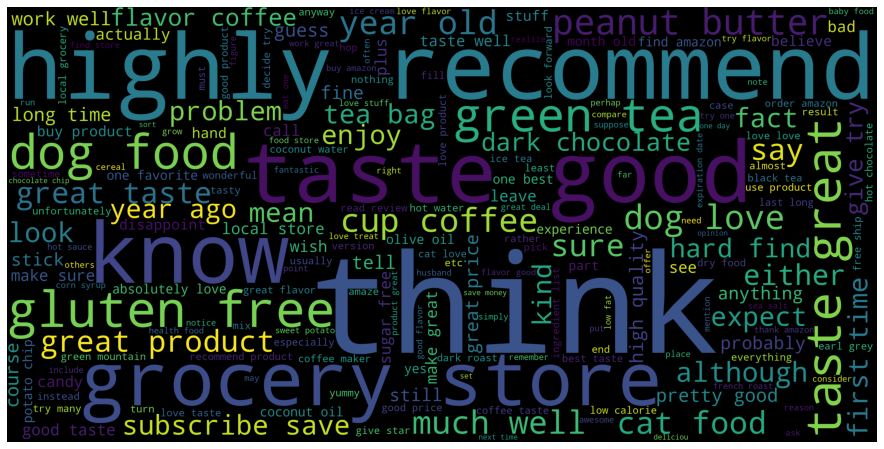

In [158]:
corpus = ' '.join(map(str, review_text))
corpus = corpus.replace("'", "")

# Create a wordcloud object
singles_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(corpus)
plt.figure(figsize=(20,8))
plt.imshow(singles_wordcloud)
plt.axis('off')
# Save the image and show it
# plt.savefig('commonwords.png')
plt.show()

Now let's check the distribution of reviews scores.

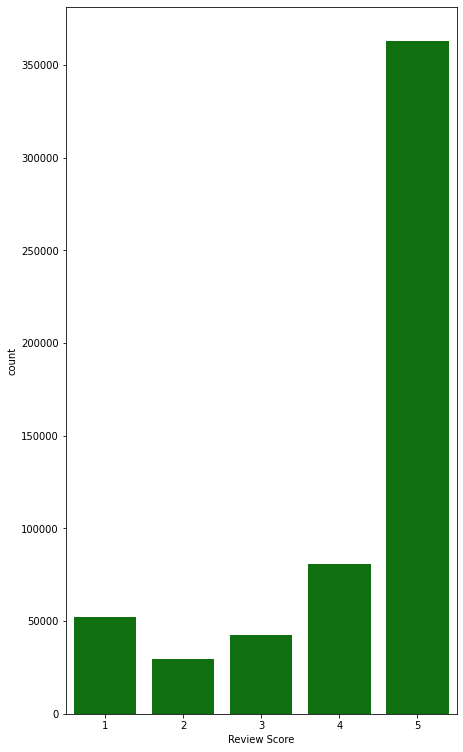

In [53]:
plt.subplots(figsize=(7,13))
sns.countplot(x='Score', data=amazon_reviews_pre, color='g')
plt.xlabel('Review Score')
plt.show()

Interesting... Now let's check if how many reviews each user wrote.

In [22]:
per_user = amazon_reviews_pre.groupby('UserId').agg({'Id': len})\
.rename(columns={'Id': 'reviews_per_user'})\
.sort_values(by='reviews_per_user',ascending=False)

per_user.reset_index(inplace=True)
per_user.head()

,UserId,reviews_per_user
0,A3OXHLG6DIBRW8,442
1,A1YUL9PCJR3JTY,410
2,AY12DBB0U420B,389
3,A281NPSIMI1C2R,365
4,A1Z54EM24Y40LL,256


Seems like some users wrote a lot of reviews! This is a bit suspicious... this indicates the high possibilty of fake reviews.

## Feature Engineering

- `reviews_length`
- `reviews_per_user`
- `avg_word_length`
- `avg_product_review`
- `is_positive_score`

In [23]:
amazon_reviews_pre['reviews_length']=amazon_reviews_pre['Cleaned_Text'].apply(len)

In [161]:
amazon_reviews_pre['reviews_length'].describe()

count    567120.000000
mean         38.423933
std          38.614319
min           0.000000
25%          16.000000
50%          27.000000
75%          46.000000
max        1904.000000
Name: reviews_length, dtype: float64

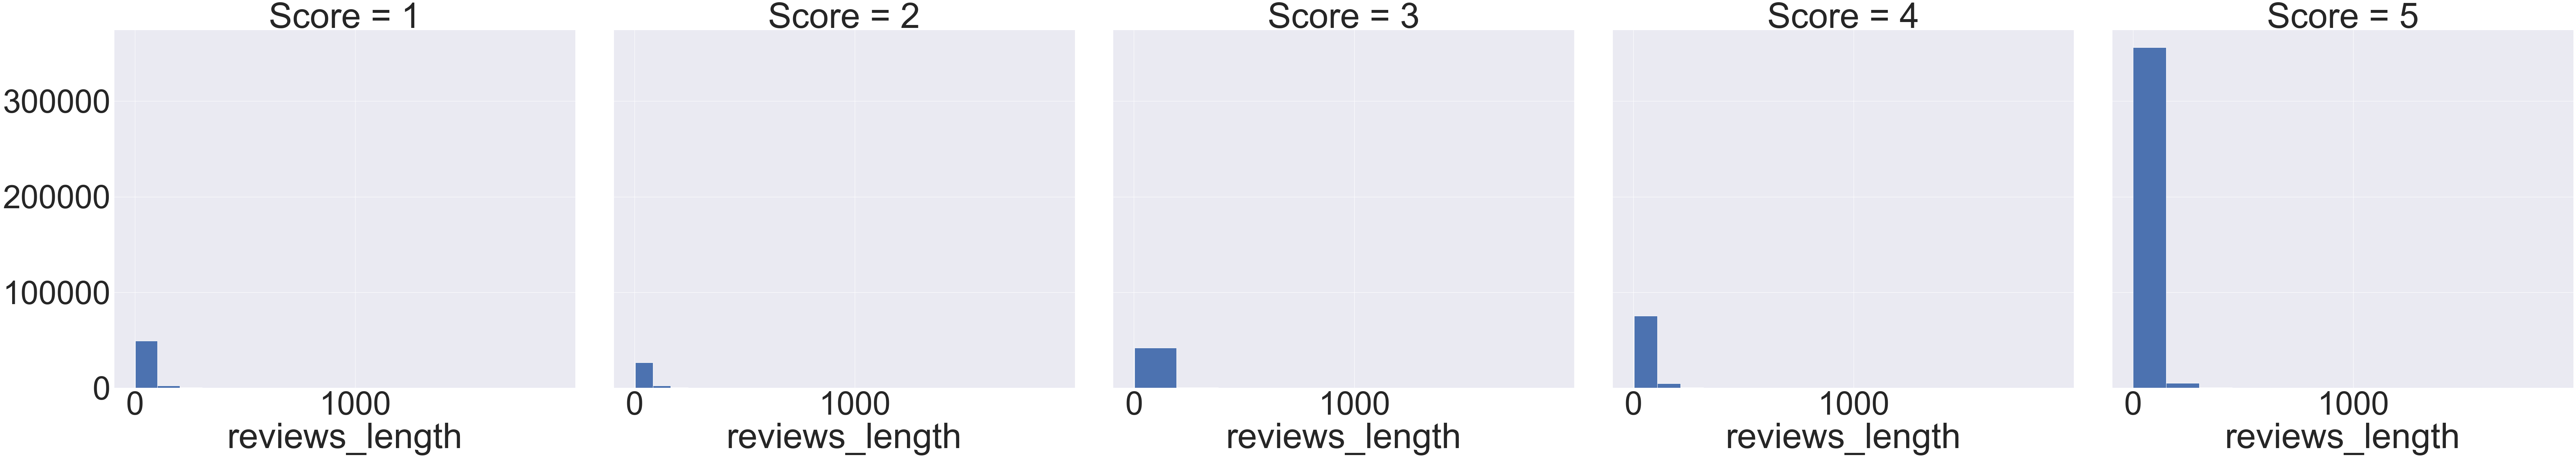

In [163]:
sns.set(font_scale=8.0)
g = sns.FacetGrid(amazon_reviews_pre, col='Score', height=20)
g.map(plt.hist,'reviews_length');

In [164]:
amazon_reviews_pre[amazon_reviews_pre['reviews_length'] == 0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Summary,Cleaned_Text,reviews_length
187520,188002,B002LMQ6OO,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0
233333,233939,B003E6COMO,A2ZE58VIDDCMR7,inna,1,2,5,1350000000,&#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#11...,&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1...,[],[],0
298890,299606,B002LMQRA2,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0
323471,324250,B002LN566C,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0
377738,378644,B00126P0HE,A2B5WE5SQOLJOL,shaheen,0,1,5,1323561600,W A R N I N IN G,T H I S C H O C O L A T E I S A D D I C T I...,[],[],0
387892,388832,B001G7QG5O,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0
486679,487864,B002LMA8FC,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0
543568,544870,B002LMXFCU,AQ09CHGCI6BI1,Jiabao Zhou,0,1,5,1314662400,good,v e r y g o o d v e r y g o o d v e r y g o o ...,[good],[],0


Some of these entries appear to be fake reviews. Interesting...

In [24]:
amazon_reviews_pre['avg_word_length'] = amazon_reviews_pre["Cleaned_Text"].apply(lambda x: np.mean([len(w) for w in x]))
amazon_reviews_pre['avg_word_length'] = round(amazon_reviews_pre['avg_word_length'])
amazon_reviews_pre['avg_word_length'].value_counts()

/home/tima/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


1.0    567112
Name: avg_word_length, dtype: int64

In [25]:
amazon_reviews_pre['avg_word_length'].isnull().value_counts()

False    567112
True          8
Name: avg_word_length, dtype: int64

In [26]:
#Imputation
amazon_reviews_pre['avg_word_length'].fillna(value=0, inplace=True)
amazon_reviews_pre['avg_word_length'].isnull().value_counts()

False    567120
Name: avg_word_length, dtype: int64

In [179]:
amazon_reviews_pre['avg_word_length'].describe()

count    567120.000000
mean          5.243132
std           0.567299
min           0.000000
25%           5.000000
50%           5.000000
75%           6.000000
max           9.000000
Name: avg_word_length, dtype: float64

Great! Moving on to the next feature..

In [27]:
amazon_reviews_pre = amazon_reviews_pre.merge(per_user, on='UserId')
amazon_reviews_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567120 entries, 0 to 567119
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      567120 non-null  int64  
 1   ProductId               567120 non-null  object 
 2   UserId                  567120 non-null  object 
 3   ProfileName             567120 non-null  object 
 4   HelpfulnessNumerator    567120 non-null  int64  
 5   HelpfulnessDenominator  567120 non-null  int64  
 6   Score                   567120 non-null  int64  
 7   Time                    567120 non-null  int64  
 8   Summary                 567120 non-null  object 
 9   Text                    567120 non-null  object 
 10  Cleaned_Summary         567120 non-null  object 
 11  Cleaned_Text            567120 non-null  object 
 12  Token_Summary           567120 non-null  object 
 13  Token_Text              567120 non-null  object 
 14  reviews_length      

In [178]:
amazon_reviews_pre['reviews_per_user'].describe()

count    567120.000000
mean         10.852116
std          28.835171
min           1.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         442.000000
Name: reviews_per_user, dtype: float64

Moving on..

In [28]:
product_score = amazon_reviews_pre.groupby('ProductId').agg({'Score': np.mean})\
.rename(columns={'Score': 'avg_product_score'})\
.sort_values(by='avg_product_score',ascending=False)

product_score.reset_index(inplace=True)
product_score.head()

,ProductId,avg_product_score
0,B00214BO58,5.0
1,B002PDYN44,5.0
2,B002P9QAJE,5.0
3,B002P9QRCO,5.0
4,B002PA1KW0,5.0


In [29]:
amazon_reviews_pre = amazon_reviews_pre.merge(product_score, on='ProductId')
amazon_reviews_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567120 entries, 0 to 567119
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      567120 non-null  int64  
 1   ProductId               567120 non-null  object 
 2   UserId                  567120 non-null  object 
 3   ProfileName             567120 non-null  object 
 4   HelpfulnessNumerator    567120 non-null  int64  
 5   HelpfulnessDenominator  567120 non-null  int64  
 6   Score                   567120 non-null  int64  
 7   Time                    567120 non-null  int64  
 8   Summary                 567120 non-null  object 
 9   Text                    567120 non-null  object 
 10  Cleaned_Summary         567120 non-null  object 
 11  Cleaned_Text            567120 non-null  object 
 12  Token_Summary           567120 non-null  object 
 13  Token_Text              567120 non-null  object 
 14  reviews_length      

In [182]:
amazon_reviews_pre['avg_product_score'].describe()

count    567120.000000
mean          4.184148
std           0.635914
min           1.000000
25%           3.901639
50%           4.306122
75%           4.594595
max           5.000000
Name: avg_product_score, dtype: float64

In [30]:
#For classification
amazon_reviews_pre["is_positive_score"] = amazon_reviews_pre["Score"].apply(lambda x: 1 if x >3 else 0)
amazon_reviews_pre["is_positive_score"].value_counts()

1    442876
0    124244
Name: is_positive_score, dtype: int64

## Data Modeling

### Topic Modeling

In [31]:
cores = multiprocessing.cpu_count() 

#Set the model
model = Word2Vec(review_text,
                 vector_size=50,
                 sg=0,
                 cbow_mean=0,
                 negative=10,
                 window=7,
                 max_vocab_size=None,
                 min_count=3,
                 workers=cores-1)
#Get training loss
model.get_latest_training_loss()

0.0

In [184]:
#Try out
model.wv.most_similar('fish', topn=15)

[('salmon', 0.9982183575630188),
 ('tuna', 0.997514545917511),
 ('chicken', 0.9970763921737671),
 ('vegetable', 0.9963887333869934),
 ('cat', 0.9962212443351746),
 ('also', 0.9961456060409546),
 ('shrimp', 0.996145486831665),
 ('egg', 0.9961391687393188),
 ('can', 0.9959477782249451),
 ('especially', 0.99583899974823),
 ('course', 0.9956293106079102),
 ('meat', 0.9956168532371521),
 ('although', 0.9954730272293091),
 ('grill', 0.9954397678375244),
 ('actually', 0.9954111576080322)]

In [189]:
model.wv.doesnt_match("good bad amazing child awful".split())

'child'

Results are promising.. Let's build our bigrams and trigrams.

In [190]:
#Build the bigram and trigram models
bigram = gensim.models.Phrases(review_text, min_count=5, threshold=100) #higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[review_text], threshold=100)  

#Get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(corpus):
    return [bigram_mod[doc] for doc in corpus]

def make_trigrams(corpus):
    return [trigram_mod[bigram_mod[doc]] for doc in corpus]

In [191]:
#Prepare texts of most frequent 2 words together as well as 3 words
text_bigrams = make_bigrams(review_text)
text_trigrams = make_trigrams(review_text)

In [192]:
#Set the bimodel
bi_model = Word2Vec(text_bigrams,
                    vector_size=300,
                    cbow_mean=0,
                    negative=10,
                    window=7,
                    max_vocab_size=None,
                    min_count=3,
                    workers=cores-1)
#Get training loss
bi_model.get_latest_training_loss()

0.0

In [194]:
bi_model.wv.most_similar('fish', topn=15)

[('year', 0.9654628038406372),
 ('coffee', 0.9646959900856018),
 ('like', 0.9644381403923035),
 ('also', 0.9643710255622864),
 ('dog', 0.9642900824546814),
 ('great', 0.9638839364051819),
 ('day', 0.9636868834495544),
 ('love', 0.9636133909225464),
 ('purchase', 0.9632440209388733),
 ('buy', 0.9631373286247253),
 ('would', 0.9629617929458618),
 ('one', 0.9629048705101013),
 ('try', 0.9625825881958008),
 ('food', 0.962486207485199),
 ('good', 0.9623908400535583)]

In [195]:
#Set the trimodel
tri_model = Word2Vec(text_trigrams,
                    vector_size=300,
                    sg=0,
                    cbow_mean=0,
                    negative=10,
                    window=7,
                    max_vocab_size=None,
                    min_count=3,
                    workers=cores-1)
#Get training loss
tri_model.get_latest_training_loss()

0.0

In [196]:
tri_model.wv.most_similar('fish', topn=15)

[('like', 0.9644227027893066),
 ('year', 0.9642090201377869),
 ('use', 0.9639989137649536),
 ('buy', 0.9636682868003845),
 ('box', 0.963353157043457),
 ('purchase', 0.9632539749145508),
 ('chocolate', 0.9631251096725464),
 ('product', 0.9630154371261597),
 ('pack', 0.9628885388374329),
 ('order', 0.9628040790557861),
 ('want', 0.9627406597137451),
 ('also', 0.9627116918563843),
 ('coffee', 0.9626861810684204),
 ('eat', 0.9626066088676453),
 ('tea', 0.9625762104988098)]

Seems like the best performing model is the first one; our unigram or singles model.

### Word Embeddings
TensorFlow visualization for this model:

In [194]:
#Singles
vocab = np.array(model.wv.index_to_key)
vectors =  np.array(model.wv.vectors.tolist())

In [196]:
#Model tensorflow viz
savename = 'amazon_reviews'
with open( savename + '_tensors.tsv',  'w+', encoding='utf-8') as tensors:
    with open ( savename + '_metadata.tsv', 'w+') as metadata:
        for word in model.wv.index_to_key:
            encoded = word
            metadata.write(encoded + '\n')
            vector_row = '\t'.join(map(str, model.wv.get_vector(word)))
            tensors.write(vector_row + '\n')

Topic model is ready to be visualized at: [Tensorflow Embedding Projector](https://projector.tensorflow.org/)

### Sentiment Analysis



In [32]:
sid = SentimentIntensityAnalyzer()
amazon_reviews_pre["sentiments"] = amazon_reviews_pre["Cleaned_Text"].apply(lambda x: sid.polarity_scores(x))
amazon_reviews_pre = pd.concat([amazon_reviews_pre.drop(['sentiments'], axis=1), amazon_reviews_pre['sentiments'].apply(pd.Series)], axis=1)
amazon_reviews_pre.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Token_Text,reviews_length,avg_word_length,reviews_per_user,avg_product_score,is_positive_score,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,"[buy, several, vitality, can, dog, food, produ...",232,1.0,1,5.0,1,0.000,0.652,0.348,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,"[product, arrive, label, jumbo, salt, peanut, ...",163,1.0,1,1.0,0,0.169,0.831,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,"[confection, around, century, light, pillowy, ...",432,1.0,3,4.0,1,0.105,0.715,0.180,0.8265
3,320691,B000CQ26E0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",0,0,4,1187740800,"Fast, Easy and organic","For speed and wholesome goodness, Annie's can ...",...,"[speed, wholesome, goodness, annie, never, bea...",234,1.0,3,4.0,1,0.000,0.685,0.315,0.9435
4,320680,B000CQ26E0,A2RNYW2HIQBGSM,Carlos Alvarez,3,3,5,1238371200,"Tastes great, easy to make",These are really good. You do need to add jus...,...,"[good, need, add, water, recommend, best, cons...",167,1.0,45,4.0,1,0.000,0.724,0.276,0.8718


In [47]:
amazon_reviews_pre[amazon_reviews_pre["compound"]==0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Token_Text,reviews_length,avg_word_length,reviews_per_user,avg_product_score,is_positive_score,neg,neu,pos,compound
515,135735,B003THML30,A14F345W10VVT1,Glenn Gordon,0,1,2,1322352000,"Tasty, but disappointed",The listing of the box describes as twice as m...,...,"[list, box, describe, twice, many, bar, serve,...",164,1.0,8,3.736111,0,0.0,1.0,0.0,0.0
587,271547,B004YWHTBS,A14F345W10VVT1,Glenn Gordon,0,1,2,1322352000,"Tasty, but disappointed",The listing of the box describes as twice as m...,...,"[list, box, describe, twice, many, bar, serve,...",164,1.0,8,3.736111,0,0.0,1.0,0.0,0.0
659,295763,B003WLC4VC,A14F345W10VVT1,Glenn Gordon,0,1,2,1322352000,"Tasty, but disappointed",The listing of the box describes as twice as m...,...,"[list, box, describe, twice, many, bar, serve,...",164,1.0,8,3.736111,0,0.0,1.0,0.0,0.0
731,306187,B003THQKXM,A14F345W10VVT1,Glenn Gordon,0,1,2,1322352000,"Tasty, but disappointed",The listing of the box describes as twice as m...,...,"[list, box, describe, twice, many, bar, serve,...",164,1.0,8,3.736111,0,0.0,1.0,0.0,0.0
803,370884,B003NZHOQ2,A14F345W10VVT1,Glenn Gordon,0,1,2,1322352000,"Tasty, but disappointed",The listing of the box describes as twice as m...,...,"[list, box, describe, twice, many, bar, serve,...",164,1.0,8,3.736111,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566754,565011,B000EHOZUU,A3OVOTFSCLBANK,Wildenbill,1,1,5,1254614400,Good stuff,and 92 cents a can less than my local store se...,...,"[cent, le, local, store, sell, stock]",66,1.0,1,5.000000,1,0.0,1.0,0.0,0.0
566820,566519,B000XB4XBS,A34RGCZCGTN0N5,"B. J. R. Schafer ""brandy""",2,2,1,1261353600,boooooo,I only received 5 different pez out of the 12 ...,...,"[receive, different, pez, random, character, d...",277,1.0,1,2.250000,0,0.0,1.0,0.0,0.0
566821,566520,B000XB4XBS,A242KDGCE3DTQS,D. Haines,2,2,1,1259539200,What Assortment????,"I received 4 Mickey Mouse, 4 Chef from Rattato...",...,"[receive, mickey, mouse, chef, rattatouie, lig...",101,1.0,1,2.250000,0,0.0,1.0,0.0,0.0
566930,568288,B001IZHZJA,A36FJ72LXUNWOK,Harvey L,0,0,3,1276300800,Nestle Milk Chocolate Candy Bars,I grew up with this product while living in Cl...,...,"[grow, product, live, cleveland, ohio, always,...",136,1.0,1,4.000000,0,0.0,1.0,0.0,0.0


In [52]:
#Feature engineering
amazon_reviews_pre["sentiment_label"] = amazon_reviews_pre['Cleaned_Text'].apply(lambda x: "positive" if sid.polarity_scores(x)["compound"] > 0 else "negative")
amazon_reviews_pre["sentiment_label"].value_counts()

positive    507770
negative     59191
Name: sentiment_label, dtype: int64

From the previous results, it is clear that we have an **imbalanced data set** for classification, that's why we cannot choose accuracy as a metric. We will go with AUC(Area under ROC curve).

- Why accuracy not for imbalanced datasets?

Consider a scenario like this where we have an imbalanced data set. For example, consider the case of credit card fraud detection with 98% percentage of points as non-fraud(1) and rest 2% points as fraud(1). In such cases even if we predict all the points as non-fraud also we will get 98% accuracy. But actually it is not the case. So we can’t use accuracy as a metric.

- What is AUC ROC?

AUC is the area under the ROC curve. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

In [53]:
amazon_reviews_pre.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,reviews_length,avg_word_length,reviews_per_user,avg_product_score,is_positive_score,neg,neu,pos,compound,sentiment_label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,232,1.0,1,5.0,1,0.000,0.652,0.348,0.9441,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,163,1.0,1,1.0,0,0.169,0.831,0.000,-0.5664,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,432,1.0,3,4.0,1,0.105,0.715,0.180,0.8265,positive
3,320691,B000CQ26E0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",0,0,4,1187740800,"Fast, Easy and organic","For speed and wholesome goodness, Annie's can ...",...,234,1.0,3,4.0,1,0.000,0.685,0.315,0.9435,positive
4,320680,B000CQ26E0,A2RNYW2HIQBGSM,Carlos Alvarez,3,3,5,1238371200,"Tastes great, easy to make",These are really good. You do need to add jus...,...,167,1.0,45,4.0,1,0.000,0.724,0.276,0.8718,positive


In [54]:
amazon_reviews_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566961 entries, 0 to 566960
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      566961 non-null  int64  
 1   ProductId               566961 non-null  object 
 2   UserId                  566961 non-null  object 
 3   ProfileName             566961 non-null  object 
 4   HelpfulnessNumerator    566961 non-null  int64  
 5   HelpfulnessDenominator  566961 non-null  int64  
 6   Score                   566961 non-null  int64  
 7   Time                    566961 non-null  int64  
 8   Summary                 566961 non-null  object 
 9   Text                    566961 non-null  object 
 10  Cleaned_Summary         566961 non-null  object 
 11  Cleaned_Text            566961 non-null  object 
 12  Token_Summary           566961 non-null  object 
 13  Token_Text              566961 non-null  object 
 14  reviews_length      

In [57]:
amazon_reviews_pre['sentiment_label'] = LabelEncoder().fit_transform(amazon_reviews_pre["sentiment_label"])

X = amazon_reviews_pre[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'reviews_length',
                       'avg_word_length', 'reviews_per_user', 'avg_product_score','is_positive_score']]
y = amazon_reviews_pre['sentiment_label']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

(396872, 8)
(170089, 8)


### Naive Bayes

In [69]:
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
#results accuracy
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.739395664086494
0.8407069240221295


### Decision Tree

In [97]:
model= DecisionTreeClassifier(min_samples_leaf=5)
y_pred = model.fit(X_train, y_train).predict(X_test)
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7116439948269571
0.9044852988729429


### SVM

In [ ]:
model= SVC()
y_pred = model.fit(X_train, y_train).predict(X_test)
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## Review Helpfulness Score Prediction


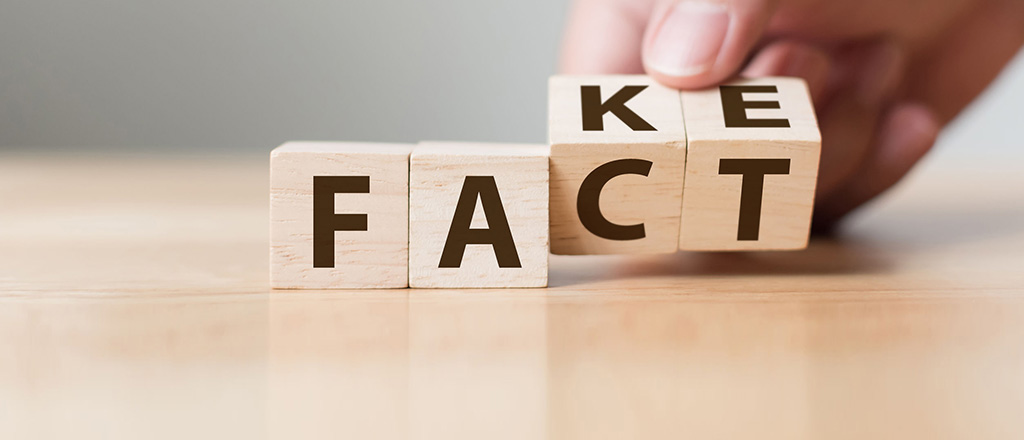

In [ ]:
amazon_reviews_pre.info()

In [ ]:
amazon_reviews_pre['sentiment_label'] = LabelEncoder().fit_transform(amazon_reviews_pre["sentiment_label"])

X = amazon_reviews_pre[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'reviews_length',
                       'avg_word_length', 'reviews_per_user', 'avg_product_score','is_positive_score']]
y = amazon_reviews_pre['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(X_train.shape)
print(X_test.shape)